In Section 8.3.3, we applied random forests to the Boston data using
max_features = 6 and using n_estimators = 100 and n_estimators =
500 . Create a plot displaying the test error resulting from random
forests on this data set for a more comprehensive range of values
for max_features and n_estimators. You can model your plot after
Figure 8.10. Describe the results obtained.

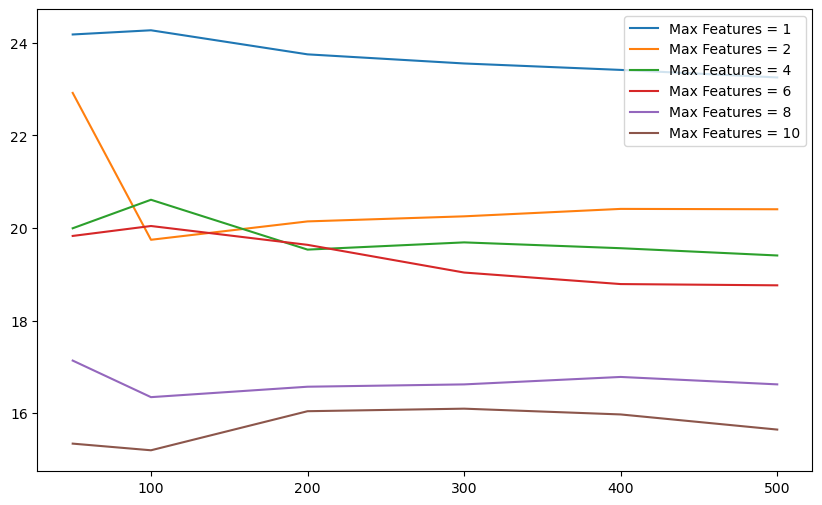

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.ensemble import RandomForestRegressor

Boston = load_data("Boston")
model = MS(Boston.columns.drop("medv"), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

(X_train , X_test , y_train , y_test) = skm.train_test_split(X, Boston["medv"], test_size =0.3, random_state =0)

max_features_values = [1, 2, 4, 6, 8, 10]
n_estimators_values = [50, 100, 200, 300, 400, 500]

test_errors = np.zeros((len(max_features_values), len(n_estimators_values)))

for i, max_features in enumerate(max_features_values):
    for j, n_estimators in enumerate(n_estimators_values):
        
        rf = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=0)
        rf.fit(X_train, y_train)
        
        test_error = np.mean((rf.predict(X_test) - y_test) ** 2)
        test_errors[i, j] = test_error

plt.figure(figsize=(10, 6))
for i, max_features in enumerate(max_features_values):
    plt.plot(n_estimators_values, test_errors[i], label=f"Max Features = {max_features}")
plt.legend()

It can be seen that the more the max feature increases, the error decreases, while the n_estimators show an improvement in certain cases, and a worse in other cases.